In [68]:
%pwd

'/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/GitHub/sales_data_analysis'

# 인사이트(중앙 편의점)
1. 소비 트랜드 만들기 
    - 지역 별 소득 수준 구분
    - 인당 평균 소비량 감소
    - 1 지역 고가품 소비 증가 경향
    - 5 지역 저가품 소비 증가 경향
       |지역|인구(명)|소득|컨셉|연령 분포|소비 집중 시간|
       |-|-|-|-|-|-|
       | 1지역 | 100 | 2억 | 부촌 | 고령남여 + 청년 | 일과 시간 소비 |
       | 2지역 | 150 | 1억 | 위성신도시 | 신혼 부부 + 어린 자녀 |  평일 오전, 주말 | 
       | 3지역 | 300 | 5천 | 업무지구 | 30~50대 생상가능인구 | 점심시간, 저녁, (특징: 주말 소비 급감) | 
       | 4지역 | 200 | 1천 | 대학가 | 20대 | 점심시간, 저녁, (특징: 주말 소비 급감) |
       | 5지역 | 250 | 3천 | 일반거주지구 | 노년층 | 늦은 밤 |
       
       -  소득은 정규분포로 데이터 입력
1. 트랜드 분석
    - 평균 1회 결제 금액이 큰 고객을 더 유치하기위한 마케팅 계획 수립을 위한 분석
    - 최근 변화한 소비 트렌드에 가장 민감하게 반응한 소득별 계층 분석

1. 데이터프레임
    - 상품 데이터프레임
>- product_num* : 상품 코드
>- price* : 상품 가격
>- price_grade : 고가 중가 저가 여부

    - 고객 데이터프레임
>- cusno* : 고객 번호
>- region* : 지역  
>- gender* : 성별  
>- age* : 나이  
>- income* : 급여  
>- grade_20 : 2020년 회원 등급
>- grade_21 : 2021년 회원 등급
>- ARPPU_20 : 2020년 회당 평균 결제액
>- ARPPU_21 : 2021년 회당 평균 결제액
>- AVC_20 : 2020년 연간 방문 횟수
>- AVC_21 : 2021년 연간 방문 횟수
>- purchase_trend : 고개 구매 추세 변화
    
    - 거래 데이터프레임
>- num_ts* : 거래 번호
>- cusno_ts* : 고객 변호
>- product_num_ts* : 상품코드
>- price_ts : 상품 가격
>- quantity* : 수량
>- amount : 해당 거래 매출
>- date*: 거래 날짜
>- year, weekday, hour : 거래 년도, 요일, 시간

 **변수명* <- 독립변수로 직접 입력해준 데이터**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import plotly.express as px
import seaborn as sns
import random
import warnings
from datetime import datetime
from dateutil.parser import parse
warnings.filterwarnings('ignore')

random.seed(0)

## 상품 목록 데이터프레임 만들기 : product

### 상품 목록 데이터프레임 양식 만들기

In [70]:
product = pd.DataFrame(columns=['product_num', 'price', 'price_grade'])
product

,product_num,price,price_grade


### 상품 목록 데이터프레임 데이터 채우기

#### 상품 코드 : product_num

In [71]:
product_num = np.arange(1, 101)
product.product_num = product_num

#### 상품 가격 : price

In [72]:
price = random.sample(list(range(1000, 100000)), 100)
product.price = price

### 상품 목록 데이터프레임 종속변수

#### 상품 가격 분류 : price_grade

In [73]:
# price_grade : 고가품 : 1, 중가품 : 2, 저가품 : 3

def price_grade(x):
    y = 0
    if x <= 20000:
        y = '3'
    elif x <= 50000:
        y = '2'
    else:
        y = '1'
    return y


product['price_grade'] = product['price'].apply(price_grade)
product

,product_num,price,price_grade
0,1,51494,1
1,2,56125,1
2,3,6306,3
3,4,34936,2
4,5,68013,1
...,...,...,...
95,96,25100,2
96,97,25823,2
97,98,25475,2
98,99,5321,3


## 거래 데이터 만들기 : purchase

### 거래 데이터프레임 만들기

#### 거래 데이터프레임 양식 만들기

In [74]:
purchase = pd.DataFrame(columns=['num_ts', 'cusno_ts', 'product_num_ts', 'price_ts',
                        'quantity', 'amount', 'date', 'year', 'weekday', 'hour'])
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour


### 거래 데이터프레임 데이터 채우기

#### 날짜,요일,시간 : date, day, time

In [75]:
# date
# date 간격 : 시간
date_list_20 = list(pd.date_range('2020-01-01', '2020-12-31', freq='H'))
date_list_21 = list(pd.date_range('2021-01-01', '2021-12-31', freq='H'))

# 2020 년 거래량 6000건
date_20 = np.random.choice(date_list_20, size=6000).tolist()
# 2021 년 거래량 4000건
date_21 = np.random.choice(date_list_21, size=4000).tolist()
date = date_20 + date_21
random.shuffle(date)
date = pd.Series(date)

#date 에서 년-월-일 형식의 날짜 추출
# purchase.date = date.dt.date
purchase.date = pd.to_datetime(date.dt.date)

# # year(년도)
purchase.year = date.dt.year

# # day(요일)
purchase.weekday = date.dt.weekday

# # 시간
purchase.hour = date.dt.hour

purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          0 non-null      object        
 1   cusno_ts        0 non-null      object        
 2   product_num_ts  0 non-null      object        
 3   price_ts        0 non-null      object        
 4   quantity        0 non-null      object        
 5   amount          0 non-null      object        
 6   date            10000 non-null  datetime64[ns]
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 781.4+ KB


#### 거래 번호 : num_ts

In [76]:
num_ts = np.arange(0, 10000)
purchase.num_ts = num_ts

#### 고객번호 : cusno_ts

In [77]:
# 기존 cusno가 중복될 수 있도록 만들기
cusno_ts = np.random.choice(list(np.arange(10000, 11000)), size=10000)
purchase.cusno_ts = cusno_ts

#### 상품코드 : product_num_ts

In [78]:
product_num_ts = np.random.choice(list(product_num), size=10000)
purchase.product_num_ts = product_num_ts

price_grade_1 = product[product['price_grade'] == '1'].product_num.tolist()
price_grade_2 = product[product['price_grade'] == '2'].product_num.tolist()
price_grade_3 = product[product['price_grade'] == '3'].product_num.tolist()
price_grade_3

price_grade_1_20 = np.random.choice(price_grade_1, 1000).tolist()
price_grade_2_20 = np.random.choice(price_grade_2, 2000).tolist()
price_grade_3_20 = np.random.choice(price_grade_3, 3000).tolist()
product_num_ts_20 = price_grade_1_20 + price_grade_2_20 + price_grade_3_20
random.shuffle(product_num_ts_20)
purchase[purchase['year'] == 2020].product_num_ts = product_num_ts_20

price_grade_1_21 = np.random.choice(price_grade_1, 2000).tolist()
price_grade_2_21 = np.random.choice(price_grade_2, 1000).tolist()
price_grade_3_21 = np.random.choice(price_grade_3, 1000).tolist()
product_num_ts_21 = price_grade_1_21 + price_grade_2_21 + price_grade_3_21
random.shuffle(product_num_ts_21)
purchase[purchase['year'] == 2021].product_num_ts = product_num_ts_21

#### 상품 가격 : price_ts

In [79]:
def price(x):
    price = str(product[product.product_num == x].price)
    price = int(price.split()[1])
    return price


purchase.price_ts = pd.Series(purchase.product_num_ts.map(price))
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour
0,0,10155,66,19677,NaN,NaN,2020-05-28,2020,3,20
1,1,10142,91,51449,NaN,NaN,2020-07-16,2020,3,14
2,2,10235,100,81317,NaN,NaN,2020-09-03,2020,3,8
3,3,10385,70,11544,NaN,NaN,2020-09-01,2020,1,13
4,4,10212,27,10665,NaN,NaN,2020-05-19,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
9995,9995,10578,88,59325,NaN,NaN,2020-05-27,2020,2,17
9996,9996,10851,13,67150,NaN,NaN,2020-06-10,2020,2,17
9997,9997,10941,100,81317,NaN,NaN,2020-09-07,2020,0,19
9998,9998,10089,46,2840,NaN,NaN,2021-03-04,2021,3,17


#### 구매수량 : quantity

In [80]:
# 2020년 구매수량 데이터 생성
a_20 = np.random.randint(1, 4, size=4500).tolist()
b_20 = np.random.randint(4, 7, size=3500).tolist()
c_20 = np.random.randint(7, 10, size=2000).tolist()
li_20 = a_20+b_20+c_20
random.shuffle(li_20)
purchase.quantity[purchase.year == 2020] = li_20

# 2021년 구매수량 데이터 생성
a_21 = np.random.randint(1, 4, size=6500).tolist()
b_21 = np.random.randint(4, 7, size=2500).tolist()
c_21 = np.random.randint(7, 10, size=1000).tolist()
li_21 = a_21+b_21+c_21
random.shuffle(li_21)
purchase.quantity[purchase.year == 2021] = li_21
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   cusno_ts        10000 non-null  int64         
 2   product_num_ts  10000 non-null  int64         
 3   price_ts        10000 non-null  int64         
 4   quantity        10000 non-null  object        
 5   amount          0 non-null      object        
 6   date            10000 non-null  datetime64[ns]
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 781.4+ KB


### 거래 데이터프레임 종속변수

#### 거래별 거래총액 : amount

In [81]:
def price(x):
    price = str(product[product.product_num == x].price)
    price = int(price.split()[1])
    return price


purchase.amount = pd.Series(
    purchase.product_num_ts.map(price))*purchase.quantity
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour
0,0,10155,66,19677,4,78708,2020-05-28,2020,3,20
1,1,10142,91,51449,5,257245,2020-07-16,2020,3,14
2,2,10235,100,81317,6,487902,2020-09-03,2020,3,8
3,3,10385,70,11544,3,34632,2020-09-01,2020,1,13
4,4,10212,27,10665,2,21330,2020-05-19,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
9995,9995,10578,88,59325,5,296625,2020-05-27,2020,2,17
9996,9996,10851,13,67150,6,402900,2020-06-10,2020,2,17
9997,9997,10941,100,81317,3,243951,2020-09-07,2020,0,19
9998,9998,10089,46,2840,1,2840,2021-03-04,2021,3,17


## 고객 데이터프레임 만들기 : customer

### 고객 데이터프레임 양식 만들기

In [82]:
customer = pd.DataFrame(columns=['cusno', 'region', 'gender', 'age',  'income', 'grade_20',
                        'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend'])
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend


### 고객 데이터프레임 데이터 채우기

#### 고객 번호 : cusno

In [83]:
cusno = np.arange(10000, 11000)
customer.cusno = cusno

#### 거주 지역 : region

In [84]:
# 지역별 인구 분포 산정
area_1 = np.random.randint(1, 2, size=100).tolist()
area_2 = np.random.randint(2, 3, size=150).tolist()
area_3 = np.random.randint(3, 4, size=300).tolist()
area_4 = np.random.randint(4, 5, size=200).tolist()
area_5 = np.random.randint(5, 6, size=250).tolist()
li = area_1+area_2+area_3+area_4+area_5
random.shuffle(li)

customer.region = li

#### 소득 : income

In [85]:
# 지역별 소득 분포 산정 : 정규분포 사용
customer.income[customer.region == 1] = np.random.normal(10, 3, 100)*20000
customer.income[customer.region == 2] = np.random.normal(10, 2, 150)*10000
customer.income[customer.region == 3] = np.random.normal(10, 1, 300)*5000
customer.income[customer.region == 4] = np.random.normal(10, 2, 200)*1000
customer.income[customer.region == 5] = np.random.normal(10, 0.5, 250)*3000
customer.income = customer.income.map(lambda x: int(x))

##### 지역별 소득 값 중 이상치 보정

<AxesSubplot:xlabel='region', ylabel='income'>

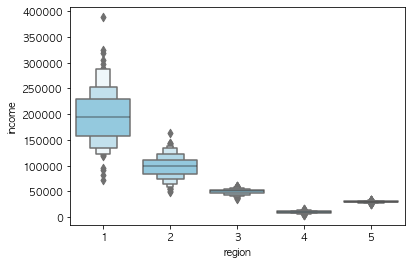

In [86]:
# 지역에 따른 소득 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='income', data=customer, color='skyblue')

In [87]:
# 소득 컬럼의 통계 요약
customer.describe()

,cusno,region,income
count,1000.000000,1000.000000,1000.000000
mean,10499.500000,3.350000,58823.611000
std,288.819436,1.276373,56777.058498
min,10000.000000,1.000000,4414.000000
25%,10249.750000,2.750000,28778.750000
50%,10499.500000,3.000000,45206.000000
75%,10749.250000,4.250000,59291.750000
max,10999.000000,5.000000,388305.000000


In [88]:
# 고객 소득 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    # 사분위 수(quartile)
    Q1 = cus_info["income"]["25%"]
    Q3 = cus_info["income"]["75%"]
    # 사분위간 범위(Interquartile range, IQR)
    IQR = Q3 - Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].income <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].income >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].income
    print(outlier, '\n')

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 2개
# 2지역: 0개
# 3지역: 2개
# 4지역: 4개
# 5지역: 2개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
129    388305
Name: income, dtype: int64 

2지역 이상치
186    163022
Name: income, dtype: int64 

3지역 이상치
304    36524
878    34824
Name: income, dtype: int64 

4지역 이상치
218     5242
505     5040
658    15314
843    16117
882     5135
912    15602
919     4414
Name: income, dtype: int64 

5지역 이상치
12     26245
69     33644
103    25950
660    26187
749    33985
980    33512
Name: income, dtype: int64 



#### 연령 : age

##### 지역별 연령 데이터 산정

In [89]:
# 1 지역 연령 데이터 생성
age_1_old = np.random.normal(65, 6, 60).tolist()
age_1_young = np.random.normal(24, 3, 40).tolist()
age_1 = age_1_old + age_1_young
customer.age[customer.region == 1] = age_1

# 2 지역 연령 데이터 생성
age_2_old = np.random.normal(40, 3, 100).tolist()
age_2_young = np.random.normal(5, 3, 50).tolist()
age_2 = age_2_old + age_2_young
customer.age[customer.region == 2] = age_2

# # 3 지역 연령 데이터 생성
age_3 = np.random.randint(23, 57, size=300).tolist()
customer.age[customer.region == 3] = age_3

# # 4 지역 연령 데이터 생성
age_4 = np.random.randint(20, 28, size=200).tolist()
customer.age[customer.region == 4] = age_4

# # 5 지역 연령 데이터 생성
age_5 = np.random.randint(50, 85, size=250).tolist()
customer.age[customer.region == 5] = age_5

customer.age = customer.age.map(lambda x: int(x))

##### 지역별 연령 중 이상치 보정

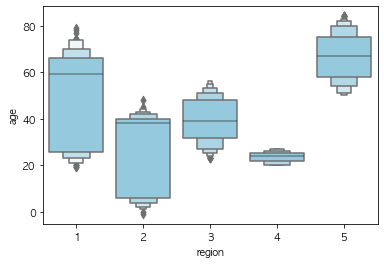

In [90]:
# 지역에 따른 연령 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='age', data=customer, color='skyblue');

In [91]:
# 고객 연령 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    # 사분위 수(quartile)
    Q1 = cus_info["age"]["25%"]
    Q3 = cus_info["age"]["75%"]
    # 사분위간 범위(Interquartile range, IQR)
    IQR = Q3-Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].age <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].age >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].age
    print(outlier)

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 0개
# 2지역: 0개
# 3지역: 0개
# 4지역: 0개
# 5지역: 0개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
Series([], Name: age, dtype: int64)
2지역 이상치
Series([], Name: age, dtype: int64)
3지역 이상치
Series([], Name: age, dtype: int64)
4지역 이상치
Series([], Name: age, dtype: int64)
5지역 이상치
Series([], Name: age, dtype: int64)


In [92]:
# 추가 이상치 검증 : 나이가 음수인 이상치 확인
grouped = customer.groupby('region').age
for i, j in grouped:
    print(i)
    print(j.value_counts().sort_index())

1
19    2
20    3
21    4
22    3
23    3
24    4
25    6
26    8
27    2
28    2
29    2
30    1
48    1
55    2
57    3
58    3
59    3
60    2
62    7
63    3
64    5
65    4
66    2
67    1
68    5
69    4
70    3
72    4
73    1
74    4
77    1
78    1
79    1
Name: age, dtype: int64
2
-1      1
 0      1
 1      5
 2      4
 3      8
 4      4
 5      8
 6      9
 7      6
 8      3
 9      1
 33     2
 35     3
 36     7
 37     6
 38    14
 39    18
 40    14
 41     8
 42    12
 43     7
 44     7
 45     1
 48     1
Name: age, dtype: int64
3
23     5
24    11
25     6
26    12
27     9
28     9
29     9
30     6
31     8
32     5
33    12
34    12
35     5
36    15
37    13
38    11
39     9
40    12
41     8
42    11
43     5
44     9
45     5
46     5
47    12
48     2
49    13
50    17
51     8
52     9
53     9
54     5
55     6
56     7
Name: age, dtype: int64
4
20    27
21    23
22    17
23    24
24    26
25    39
26    24
27    20
Name: age, dtype: int64
5
50     9
51 

In [93]:
# 추가 이상치 검증 : 나이가 음수인 이상치를 절대값을 이용하여 유효한 값으로 보정
customer[customer.age <= 0] = abs(customer[customer.age <= 0])
customer.age.value_counts().sort_index()

0      1
1      6
2      4
3      8
4      4
      ..
80     4
81    10
82     6
83     6
84     7
Name: age, Length: 76, dtype: int64

#### 성별 : gender

##### 지역별 성별 데이터 산정

In [94]:
# 1 지역 성별 데이터 생성
gender_1_male = np.random.randint(0, 1, size=40).tolist()
gender_1_female = np.random.randint(1, 2, size=60).tolist()
gender_1 = gender_1_male + gender_1_female
random.shuffle(gender_1)
customer.gender[customer.region == 1] = gender_1

# 2 지역 성별 데이터 생성
gender_2 = np.random.randint(0, 2, size=150)
customer.gender[customer.region == 2] = gender_2

# 3 지역 성별 데이터 생성
gender_3 = np.random.randint(0, 2, size=300)
customer.gender[customer.region == 3] = gender_3

# 4 지역 성별 데이터 생성
gender_4 = np.random.randint(0, 2, size=200)
customer.gender[customer.region == 4] = gender_4

# 5 지역 성별 데이터 생성
gender_5 = np.random.randint(0, 2, size=250)
customer.gender[customer.region == 5] = gender_5

customer.gender = customer.gender.map(lambda x: int(x))
gender_count = customer.gender.value_counts().sort_index()

print(f'남성 : {gender_count[0]}명\n여성 : {gender_count[1]}명')

남성 : 477명
여성 : 523명


### 고객 데이터프레임 종속변수

#### 년도별 고객별 연간 매출액 : ASC_20, ASC_21

In [95]:
li_2020 = []
li_2021 = []
for i in range(10000, 11000):
    a = purchase[(purchase['cusno_ts'] == i) & (
        purchase["year"] == 2020)].amount.sum()
    b = purchase[(purchase['cusno_ts'] == i) & (
        purchase["year"] == 2021)].amount.sum()

    li_2020.append(a)
    li_2021.append(b)

customer.ASC_20 = li_2020
customer.ASC_21 = li_2021

#### 년도별 고객 등급 : grade_20, grade_21

In [96]:
# 고객 등급 선정
# 3가지 등급, 인원수 1:1:1 비율로 선정
bin_dividers = np.linspace(customer.ASC_20.min(), customer.ASC_20.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']  # qcut
customer['grade_20'] = pd.cut(x=customer.ASC_20,  # 데이터 배열
                              bins=bin_dividers,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부

bin_dividers = np.linspace(customer.ASC_21.min(), customer.ASC_21.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']
customer['grade_21'] = pd.cut(x=customer.ASC_21,  # 데이터 배열
                              bins=bin_dividers,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부

#### 년도별 고객별 연간 방문 횟수 : AVC_20, AVC_21

In [97]:
li_2020 = []
li_2021 = []
for i in range(10000, 11000):
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2020)]
    li_2020.append(len(a))
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2021)]
    li_2021.append(len(a))

customer.AVC_20 = li_2020
customer.AVC_21 = li_2021

#### 년도별 고객별 회당 평균 결제액(Average Revenue Per Paid User) : ARPPU_20, ARPPU_21

In [98]:
customer.ARPPU_20 = (customer.ASC_20 / customer.AVC_20).round()
customer.ARPPU_21 = (customer.ASC_21 / customer.AVC_21).round()

#### 고객별 구매 추세 변화 : purchase_trend

In [99]:
customer.purchase_trend = (customer.ASC_21 > customer.ASC_20)

## DataFrame 확인

### 결측치 처리

In [100]:
customer.isnull().sum()

cusno              0
region             0
gender             0
age                0
income             0
grade_20           0
grade_21           0
ARPPU_20           5
ARPPU_21          19
AVC_20             0
AVC_21             0
ASC_20             0
ASC_21             0
purchase_trend     0
dtype: int64

In [101]:
customer.ARPPU_20.fillna(0, inplace=True)
customer.ARPPU_21.fillna(0, inplace=True)
customer.isnull().sum()

cusno             0
region            0
gender            0
age               0
income            0
grade_20          0
grade_21          0
ARPPU_20          0
ARPPU_21          0
AVC_20            0
AVC_21            0
ASC_20            0
ASC_21            0
purchase_trend    0
dtype: int64

In [102]:
product

,product_num,price,price_grade
0,1,51494,1
1,2,56125,1
2,3,6306,3
3,4,34936,2
4,5,68013,1
...,...,...,...
95,96,25100,2
96,97,25823,2
97,98,25475,2
98,99,5321,3


In [103]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_num  100 non-null    int64 
 1   price        100 non-null    int64 
 2   price_grade  100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [104]:
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour
0,0,10155,66,19677,4,78708,2020-05-28,2020,3,20
1,1,10142,91,51449,5,257245,2020-07-16,2020,3,14
2,2,10235,100,81317,6,487902,2020-09-03,2020,3,8
3,3,10385,70,11544,3,34632,2020-09-01,2020,1,13
4,4,10212,27,10665,2,21330,2020-05-19,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
9995,9995,10578,88,59325,5,296625,2020-05-27,2020,2,17
9996,9996,10851,13,67150,6,402900,2020-06-10,2020,2,17
9997,9997,10941,100,81317,3,243951,2020-09-07,2020,0,19
9998,9998,10089,46,2840,1,2840,2021-03-04,2021,3,17


In [105]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   cusno_ts        10000 non-null  int64         
 2   product_num_ts  10000 non-null  int64         
 3   price_ts        10000 non-null  int64         
 4   quantity        10000 non-null  object        
 5   amount          10000 non-null  object        
 6   date            10000 non-null  datetime64[ns]
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 781.4+ KB


In [106]:
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,26,56619,Gold,Silver,263220.0,92434.0,7,4,1842540,369738,False
1,10001,2,1,38,82439,Silver,Gold,258569.0,147773.0,4,7,1034277,1034412,True
2,10002,4,0,24,9661,Silver,Gold,230657.0,232669.0,5,7,1153286,1628686,True
3,10003,2,1,42,107264,Silver,Gold,321086.0,287960.0,3,4,963257,1151840,True
4,10004,4,1,25,10542,Silver,Silver,162360.0,109703.0,3,7,487081,767919,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,3,1,28,43293,Silver,Silver,121950.0,85900.0,5,1,609751,85900,False
996,10996,3,1,38,50574,Silver,Silver,174148.0,204964.0,4,4,696593,819858,True
997,10997,5,0,72,31521,Gold,Silver,269966.0,203993.0,6,4,1619797,815971,False
998,10998,4,0,25,10996,Silver,Silver,249086.0,173812.0,4,3,996344,521435,False


In [107]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   cusno           1000 non-null   int64   
 1   region          1000 non-null   int64   
 2   gender          1000 non-null   int64   
 3   age             1000 non-null   int64   
 4   income          1000 non-null   int64   
 5   grade_20        1000 non-null   category
 6   grade_21        1000 non-null   category
 7   ARPPU_20        1000 non-null   float64 
 8   ARPPU_21        1000 non-null   float64 
 9   AVC_20          1000 non-null   int64   
 10  AVC_21          1000 non-null   int64   
 11  ASC_20          1000 non-null   int64   
 12  ASC_21          1000 non-null   int64   
 13  purchase_trend  1000 non-null   bool    
dtypes: bool(1), category(2), float64(2), int64(9)
memory usage: 89.2 KB


# 데이터 분석 및 시각화

## 데이터프레임 Merge

In [108]:
# Merge purchase and customer
df = purchase.merge(customer, how='left', left_on='cusno_ts', right_on='cusno', left_index=False,
                    right_index=False, sort=False, suffixes=('_ts', '_c'), copy=True, indicator=False, validate=None)

# Merge additional product
df = df.merge(product, how='left', left_on='product_num_ts',
              right_on='product_num', suffixes=('', '_p'), copy=True, indicator=False,)
df

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour,...,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend,product_num,price,price_grade
0,0,10155,66,19677,4,78708,2020-05-28,2020,3,20,...,191372.0,112074.0,6,6,1148235,672447,False,66,19677,3
1,1,10142,91,51449,5,257245,2020-07-16,2020,3,14,...,178106.0,222228.0,5,3,890529,666684,False,91,51449,1
2,2,10235,100,81317,6,487902,2020-09-03,2020,3,8,...,389636.0,55020.0,6,2,2337815,110041,False,100,81317,1
3,3,10385,70,11544,3,34632,2020-09-01,2020,1,13,...,237081.0,158014.0,2,5,474162,790070,True,70,11544,3
4,4,10212,27,10665,2,21330,2020-05-19,2020,1,5,...,55279.0,333373.0,2,5,110558,1666863,True,27,10665,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,10578,88,59325,5,296625,2020-05-27,2020,2,17,...,228265.0,73253.0,4,2,913059,146506,False,88,59325,1
9996,9996,10851,13,67150,6,402900,2020-06-10,2020,2,17,...,227887.0,221900.0,8,8,1823098,1775203,False,13,67150,1
9997,9997,10941,100,81317,3,243951,2020-09-07,2020,0,19,...,189871.0,87955.0,4,3,759484,263864,False,100,81317,1
9998,9998,10089,46,2840,1,2840,2021-03-04,2021,3,17,...,234790.0,222903.0,7,9,1643531,2006126,True,46,2840,3


In [109]:
# 중복을 제외하고 데이터 분석에 사용할 컬럼들로 이루어진 DataFrame 생성
df = df.loc[:, ['num_ts', 'date', 'product_num', 'price', 'price_grade', 'quantity', 'amount',
                'year', 'weekday', 'hour', 'cusno', 'region', 'gender', 'age', 'income',
                'grade_20', 'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend']]
df

,num_ts,date,product_num,price,price_grade,quantity,amount,year,weekday,hour,...,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,0,2020-05-28,66,19677,3,4,78708,2020,3,20,...,56089,Silver,Silver,191372.0,112074.0,6,6,1148235,672447,False
1,1,2020-07-16,91,51449,1,5,257245,2020,3,14,...,212902,Silver,Silver,178106.0,222228.0,5,3,890529,666684,False
2,2,2020-09-03,100,81317,1,6,487902,2020,3,8,...,55612,Gold,Silver,389636.0,55020.0,6,2,2337815,110041,False
3,3,2020-09-01,70,11544,3,3,34632,2020,1,13,...,29758,Silver,Silver,237081.0,158014.0,2,5,474162,790070,True
4,4,2020-05-19,27,10665,3,2,21330,2020,1,5,...,29977,Silver,Gold,55279.0,333373.0,2,5,110558,1666863,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2020-05-27,88,59325,1,5,296625,2020,2,17,...,10117,Silver,Silver,228265.0,73253.0,4,2,913059,146506,False
9996,9996,2020-06-10,13,67150,1,6,402900,2020,2,17,...,30953,Gold,Gold,227887.0,221900.0,8,8,1823098,1775203,False
9997,9997,2020-09-07,100,81317,1,3,243951,2020,0,19,...,45163,Silver,Silver,189871.0,87955.0,4,3,759484,263864,False
9998,9998,2021-03-04,46,2840,3,1,2840,2021,3,17,...,56476,Gold,VIP,234790.0,222903.0,7,9,1643531,2006126,True


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   date            10000 non-null  datetime64[ns]
 2   product_num     10000 non-null  int64         
 3   price           10000 non-null  int64         
 4   price_grade     10000 non-null  object        
 5   quantity        10000 non-null  object        
 6   amount          10000 non-null  object        
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
 10  cusno           10000 non-null  int64         
 11  region          10000 non-null  int64         
 12  gender          10000 non-null  int64         
 13  age             10000 non-null  int64         
 14  income          10000 non-null  int64         
 15  gra

## 의도한 데이터 경향성 확인
- 고객별 총 소비량 감소
- 누적 매출액 증가량 증가량 감소
- 지역별, 소득수준 별 소비량 변화
- 1 지역 고가품 소비 증가 경향
- 5 지역 저가품 소비 증가 경향


### 고객별 총 소비량 감소

True     215
False    785
Name: purchase_trend, dtype: int64


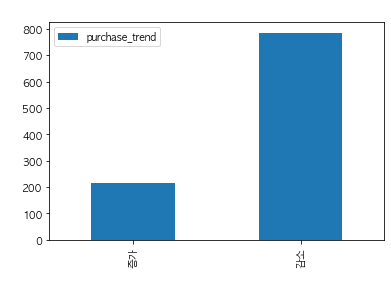

2020년 대비 2021년도 고객별 총 소비량이
 증가 215 명
 감소 785 명
으로 대다수 고객들의 소비가 감소한 것으로 나타났다. 


In [111]:
a = customer.purchase_trend.value_counts()
a = a[::-1]
print(a)
a = a.rename(index={True: '증가', False: '감소'})
a.plot(kind='bar')
plt.title('2020년 대비 2021년도 고객별 평균 소비량 변화', color='white')
plt.xlabel('purchase_trend', color='white')
plt.ylabel('고객 수', color='white')
plt.legend()
plt.show()

print(f'2020년 대비 2021년도 고객별 총 소비량이\n 증가 {a[0]} 명\n 감소 {a[1]} 명\n으로 대다수 고객들의 소비가 감소한 것으로 나타났다. ')

###  누적 매출액 증가량 감소

In [1]:
df_date = date.unique()
df_date = pd.Series(df_date, name='df_date')
df_date = df_date.sort_values()
df_date = df_date.reset_index(drop=True)
df_date = df_date.dt.date.unique()
df_date = pd.Series(df_date, name='df_date')
# print(df_date.info())
# 날짜별 총 매출액
li = []
for i in df_date:
    c = purchase[purchase['date'].dt.date == i].amount.sum()
    li.append(c)

li = pd.Series(li, name='amount')
li = li.cumsum()
df = pd.concat([df_date, li], axis=1)
df
plt.plot(df.df_date, df.amount)
plt.title('날자별 누적 매출액', color='white')
plt.xlabel('날짜', color='white')
plt.ylabel('누적 매출엑', color='white')
plt.show()

NameError: name 'date' is not defined

### 지역별, 소득수준 별 소비량 변화

### 고가품 소비 증감 현황

In [ ]:
grid = sns.FacetGrid(purchase, row='year', col='day', height=2.2, aspect=1.6)
grid.map(plt.hist, 'amount', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
grid = sns.FacetGrid(X_train, row='embarked',
                     col='survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'sex', 'fare', alpha=.5,
         ci=None, order=["male", "female"])

grid.add_legend()

In [ ]:
grid = sns.FacetGrid(X_train, row='embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep',
         order=[1, 2, 3], hue_order=["male", "female"])

grid.add_legend()

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속 변수 분리
X = df_1[['gender_c', 'age_c', 'region_c', 'ARPPU_20_c',
          'AVC_20_c', 'AVC_21_c', 'amount_20_p']]
y = df_1['sales_trend']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)